# __Quality Assesment Notebook for different mocks realizations__

To-do for this notebook:
    - run 3D cross-correlation qso-LYa and LYa_1 x Lya_2

Conclusion:
    - no correlation at the level of the 3d correlation
    - some weird correlations in the output flux

In [22]:
import fitsio
import scipy as sp
import scipy.constants
import glob
import healpy
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import h5py
import os

import picca.constants
from picca import wedgize

%matplotlib inline
rcParams['figure.figsize'] = 10, 6
rcParams['lines.linewidth'] = 4
rcParams['axes.labelsize'] = 20
rcParams['legend.fontsize'] = 20
plt.rc('text',usetex=True)

Path to the mocks

In [2]:
mock0 = {}
mock0['mock_ver'] = 'v4.0.0'
mock0['quick_ver'] = 'quick-2.0'
mock0['mock_base'] = '/project/projectdirs/desi/mocks/lya_forest/london/'+mock0['mock_ver']+'/'
mock0['delta'] = '/project/projectdirs/desi/mocks/lya_forest/picca/london/'+mock0['mock_ver']+'/'+mock0['quick_ver']+'/deltas/'
mock0['delta_attributes'] = '/project/projectdirs/desi/mocks/lya_forest/picca/london/'+mock0['mock_ver']+'/'+mock0['quick_ver']+'/iter.fits.gz'
mock0['cf_z_0_2.2'] = '/project/projectdirs/desi/mocks/lya_forest/picca/london/'+mock0['mock_ver']+'/'+mock0['quick_ver']+'/cf_z_0_2.2.fits'

mock1 = {}
mock1['mock_ver'] = 'v4.0.1'
mock1['quick_ver'] = 'quick-2.0'
mock1['mock_base'] = '/project/projectdirs/desi/mocks/lya_forest/london/'+mock1['mock_ver']+'/'
mock1['delta'] = '/project/projectdirs/desi/mocks/lya_forest/picca/london/'+mock1['mock_ver']+'/'+mock1['quick_ver']+'/deltas/'
mock1['delta_attributes'] = '/project/projectdirs/desi/mocks/lya_forest/picca/london/'+mock1['mock_ver']+'/'+mock1['quick_ver']+'/iter.fits.gz'
mock1['cf_z_0_2.2'] = '/project/projectdirs/desi/mocks/lya_forest/picca/london/'+mock1['mock_ver']+'/'+mock1['quick_ver']+'/cf_z_0_2.2.fits'

mockProducts = {}
mockProducts['cf1d_cross'] = '$HOME/Run_programs/igmhub/picca/CoLoRe_mocks/v4.0.0_v4.0.1/Correlations/cf1d_cross.fits.gz'
mockProducts['cf_z_0_2.2_cross_covar'] = '$HOME/Run_programs/igmhub/picca/CoLoRe_mocks/v4.0.0_v4.0.1/Correlations/cf_z_0_2.2_cross_covar.fits.gz'

# __Compare the catalogs__

In [3]:
# Catalogs
cat_path0 = {'master':mock0['mock_base']+'master.fits',
            'zcat':mock0['mock_base']+mock0['quick_ver']+'/zcat.fits',
            'desiDRQ':mock0['mock_base']+mock0['quick_ver']+'/zcat_desi_drq.fits',
            'random':mock0['mock_base']+'/master_randoms.fits.gz'}
cat_path1 = {'master':mock1['mock_base']+'master.fits',
            'zcat':mock1['mock_base']+mock1['quick_ver']+'/zcat.fits',
            'desiDRQ':mock1['mock_base']+mock1['quick_ver']+'/zcat_desi_drq.fits',
            'random':mock1['mock_base']+'/master_randoms.fits.gz'}

redshift_key = {'master':'Z_QSO_RSD', 'zcat':'Z', 'desiDRQ':'Z','random':'Z'}

master 7463972 7466339 False


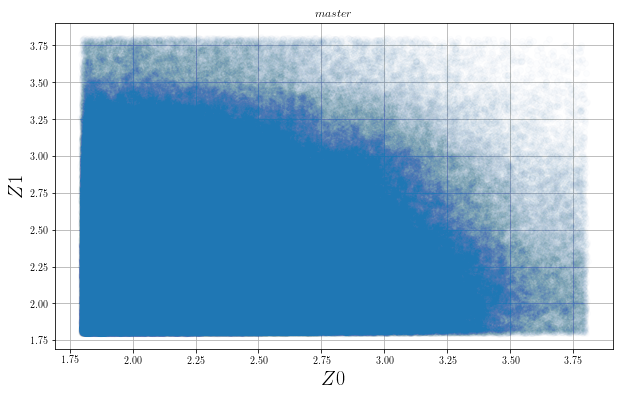

zcat 1076372 1077936 False


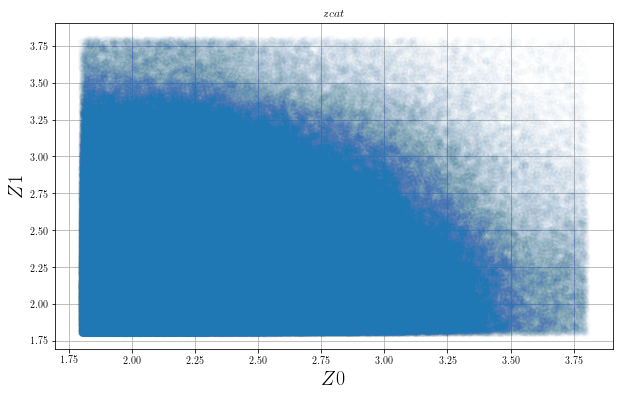

desiDRQ 1076372 1077936 False


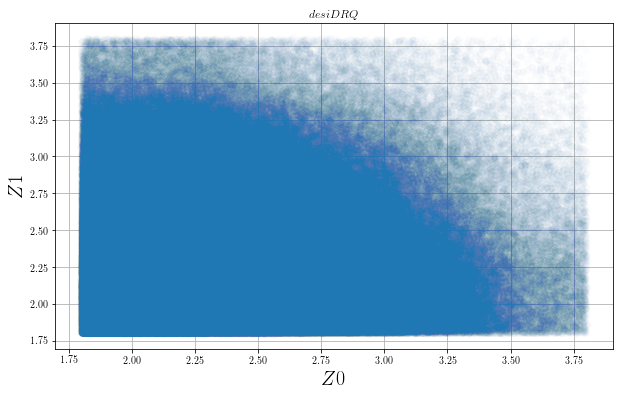

random 46440810 23933155 False


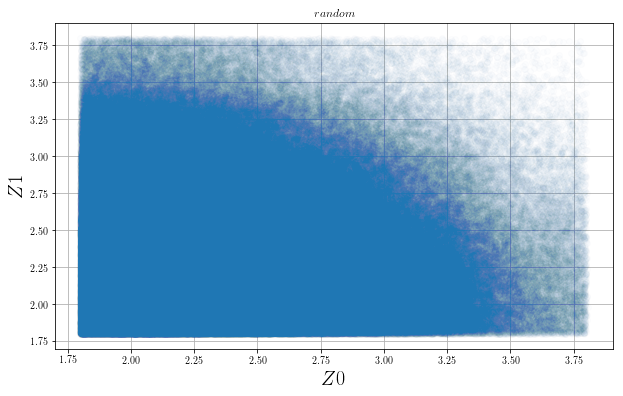

master 7463972 7466339 False


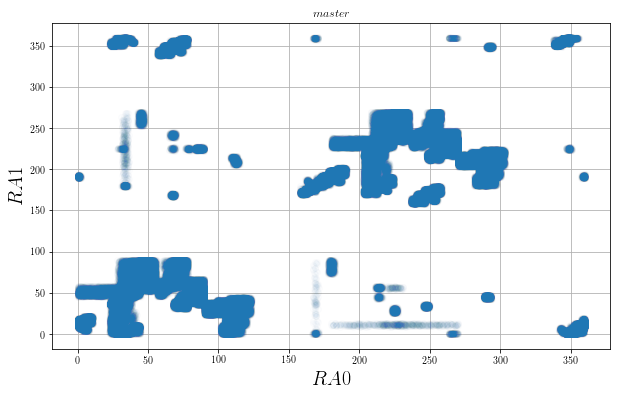

zcat 1076372 1077936 False


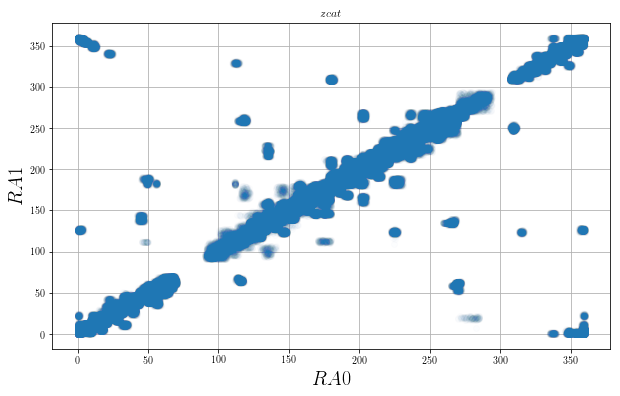

desiDRQ 1076372 1077936 False


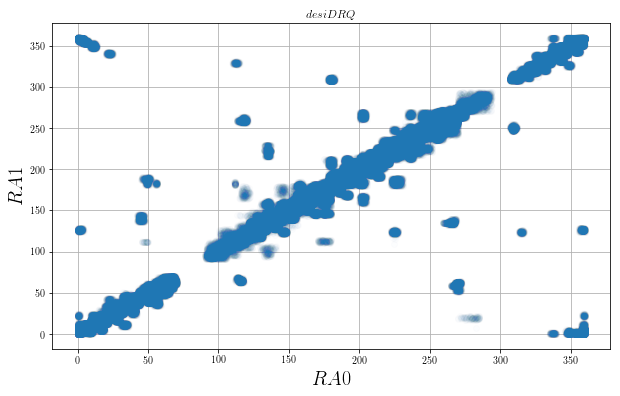

random 46440810 23933155 False


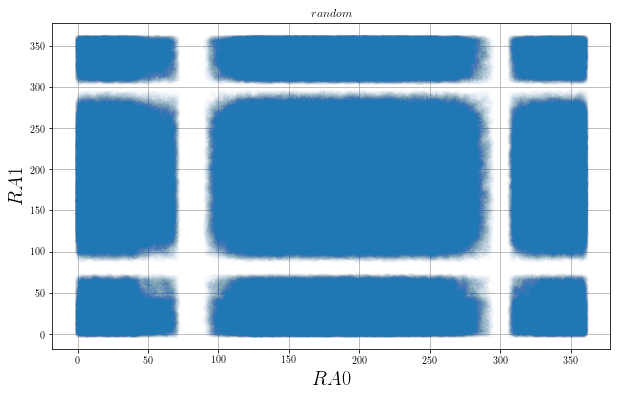

master 7463972 7466339 False


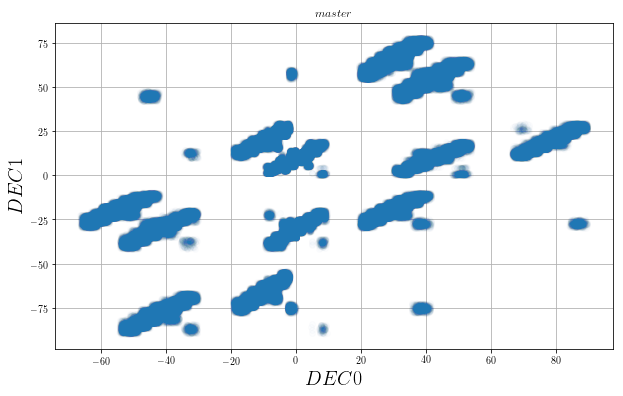

zcat 1076372 1077936 False


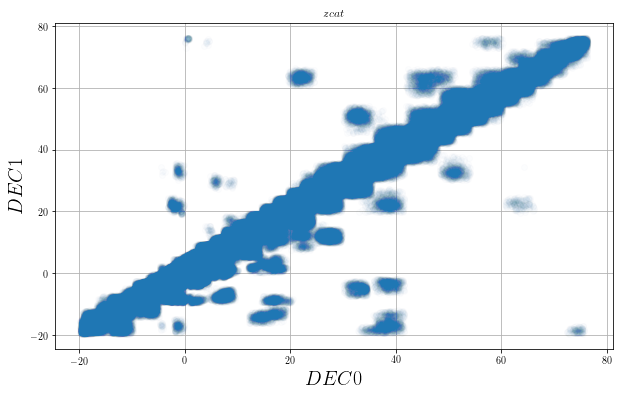

desiDRQ 1076372 1077936 False


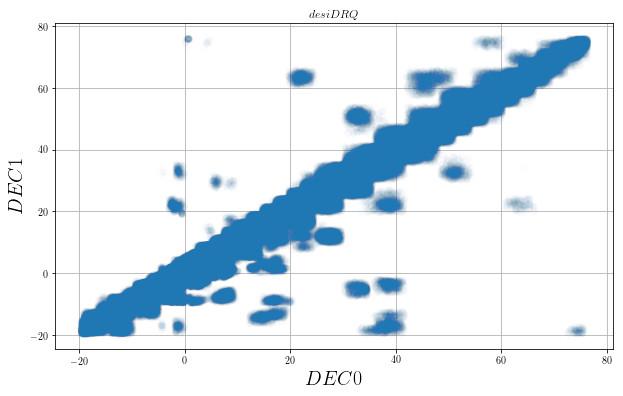

random 46440810 23933155 False


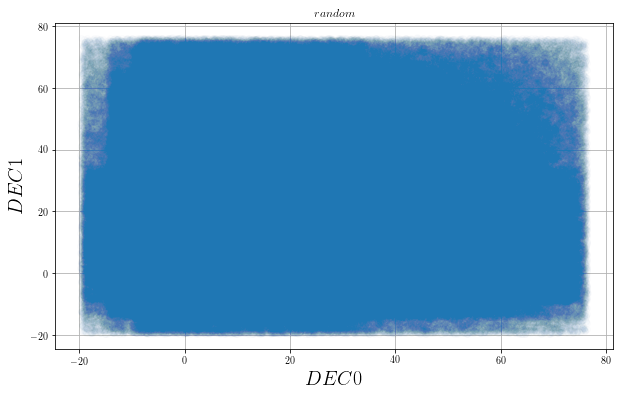

In [4]:
for el in ['Z','RA','DEC']:
    for name in cat_path0.keys():
        h0 = fitsio.FITS(cat_path0[name])
        if el=='Z':
            yyy0 = h0[1][redshift_key[name]][:]
        else:
            yyy0 = h0[1][el][:]
        h0.close()

        h1 = fitsio.FITS(cat_path1[name])
        if el=='Z':
            yyy1 = h1[1][redshift_key[name]][:]
        else:
            yyy1 = h1[1][el][:]
        h1.close()

        print(name, yyy0.size, yyy1.size, yyy0.size==yyy1.size)
        minNb = min(1000000,min(yyy0.size, yyy1.size))
    
        plt.errorbar(yyy0[:minNb], yyy1[:minNb], fmt='o', alpha=0.01)
        plt.xlabel(r'$'+el+'0$')
        plt.ylabel(r'$'+el+'1$')
        plt.title(r'$'+name+'$')
        plt.grid()
        plt.show()

# __Compare the magnitudes__

In [5]:
name_mag = {}
name_mag[0] = 'g mag: decam'
name_mag[1] = 'r mag: decam'
name_mag[2] = 'z mag: decam'
name_mag[3] = 'wise1'
name_mag[4] = 'wise2'

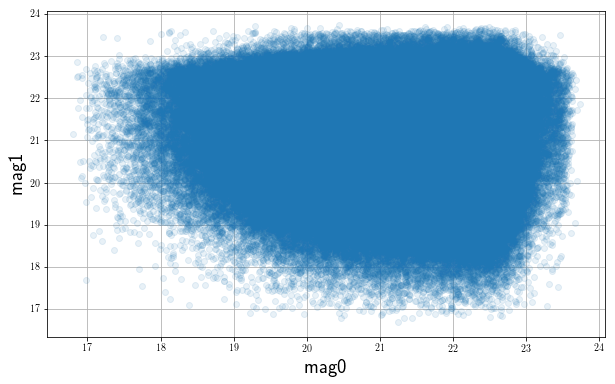

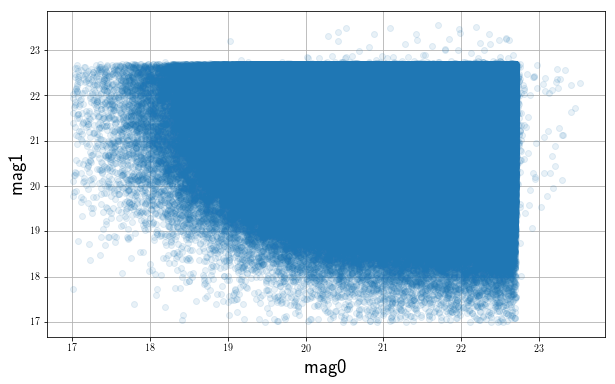

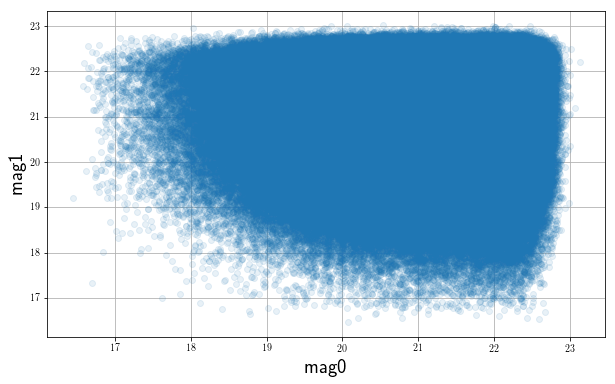

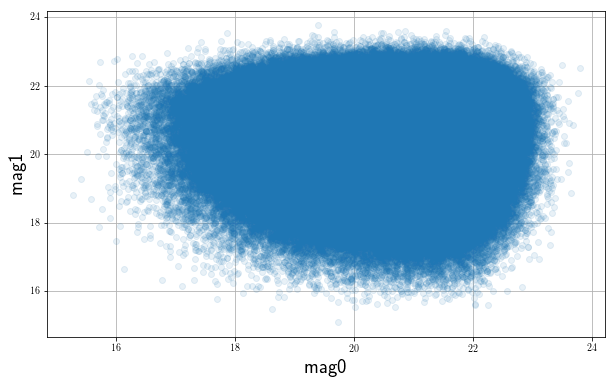

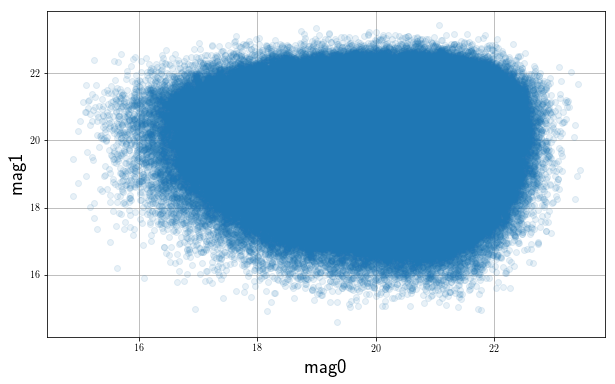

In [6]:
for i in range(5):
    h0 = fitsio.FITS(cat_path0['zcat'])
    mag0 = h0['ZCATALOG']['MAG'][:]
    h0.close()
    
    h1 = fitsio.FITS(cat_path1['zcat'])
    mag1 = h1['ZCATALOG']['MAG'][:]
    h1.close()

    minNb = min(1000000,min(mag0[:,i].size, mag1[:,i].size))
    
    plt.errorbar(mag0[:minNb,i],mag1[:minNb,i],fmt='o',alpha=0.1,label=name_mag[i])
    plt.xlabel(r'mag0')
    plt.ylabel(r'mag1')
    plt.grid()
    plt.show()

# __Compare the Lya transmission__

(2577, 14750) (2645, 14750)


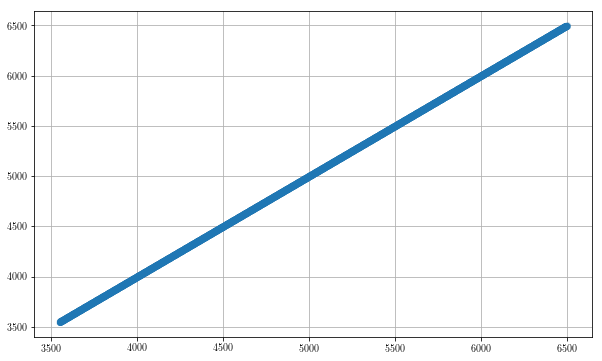

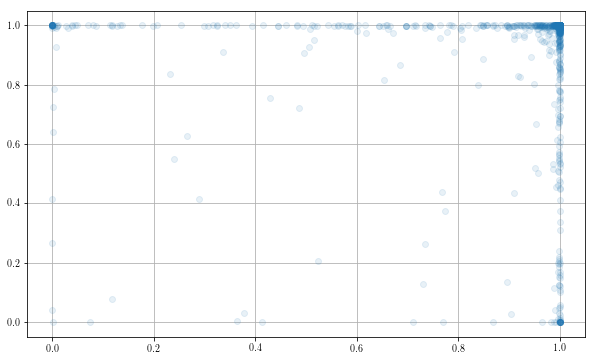

In [7]:
for i in range(1):
    f0 = mock0['mock_base']+'/'+str(i)+'/'+str(i)+'/transmission-16-'+str(i)+'.fits'
    h0 = fitsio.FITS(f0)
    z0 = h0['METADATA']['Z'][:]
    lObs0 = h0['WAVELENGTH'].read()
    trans0 = h0['TRANSMISSION'].read()
    h0.close()

    f1 = mock1['mock_base']+'/'+str(i)+'/'+str(i)+'/transmission-16-'+str(i)+'.fits'
    h1 = fitsio.FITS(f1)
    z1 = h1['METADATA']['Z'][:]
    lObs1 = h1['WAVELENGTH'].read()
    trans1 = h1['TRANSMISSION'].read()
    h1.close()
    
    print(trans0.shape, trans1.shape)
    
    plt.errorbar(lObs0,lObs1,fmt='o',alpha=0.1)
    plt.grid()
    plt.show()
    
    plt.errorbar(trans0.flatten()[:1000],trans1.flatten()[:1000],fmt='o',alpha=0.1)
    plt.grid()
    plt.show()

# __Compare the flux__

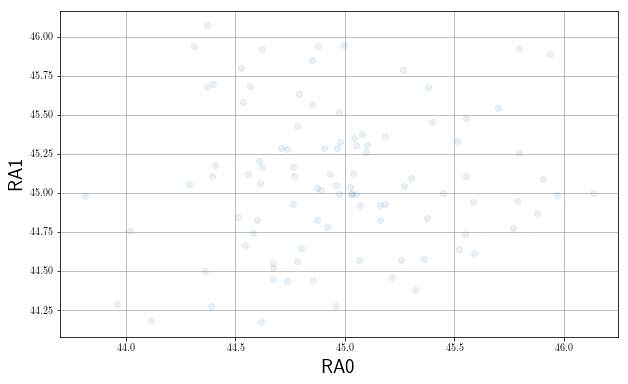

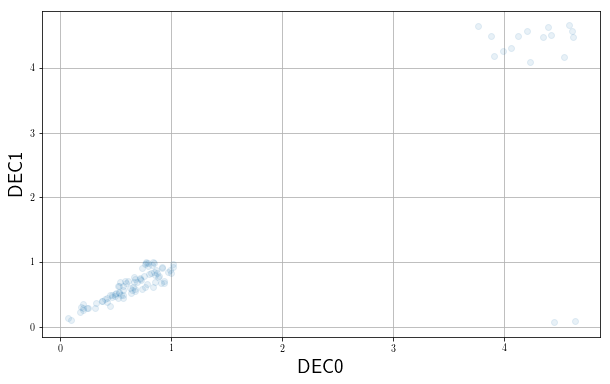

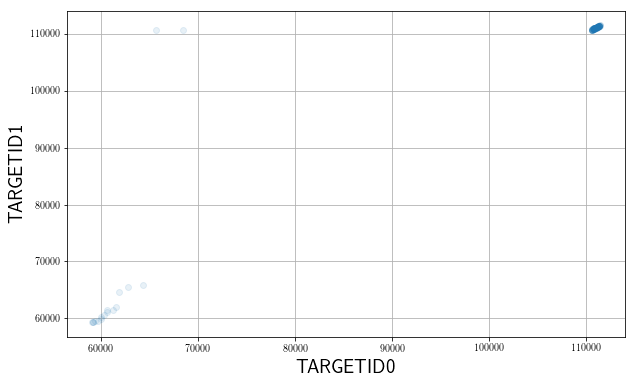

(2380,)
(2380,)


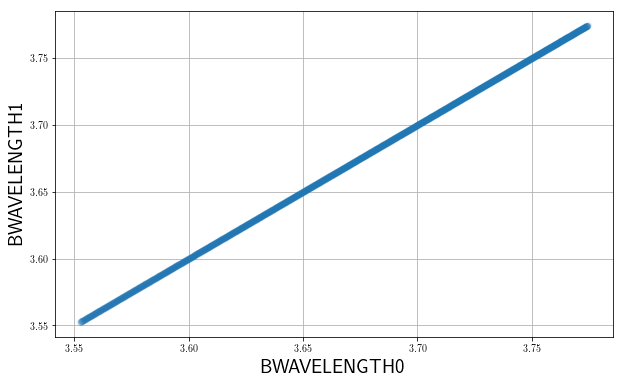

(1072, 2380)
(1123, 2380)


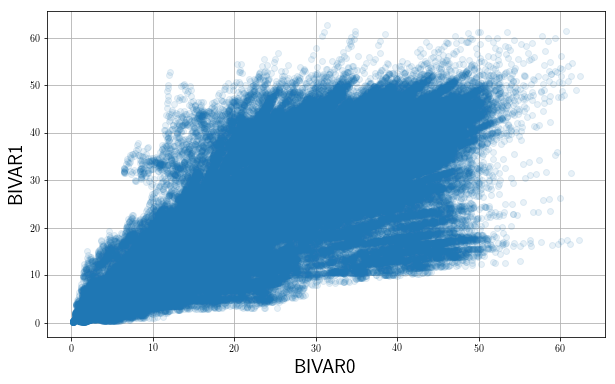

(1072, 2380)
(1123, 2380)


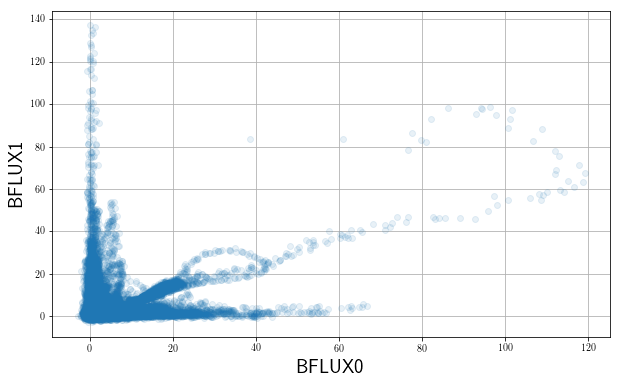

(2116,)
(2116,)


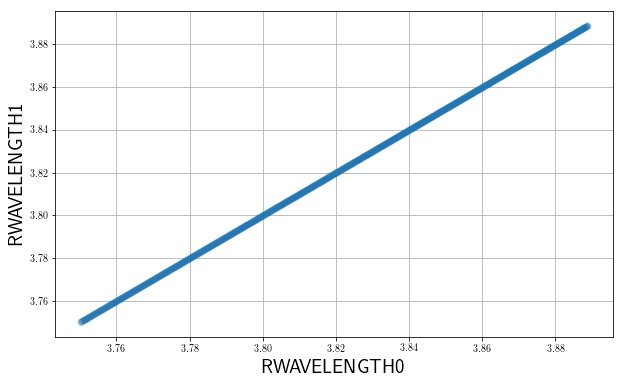

(1072, 2116)
(1123, 2116)


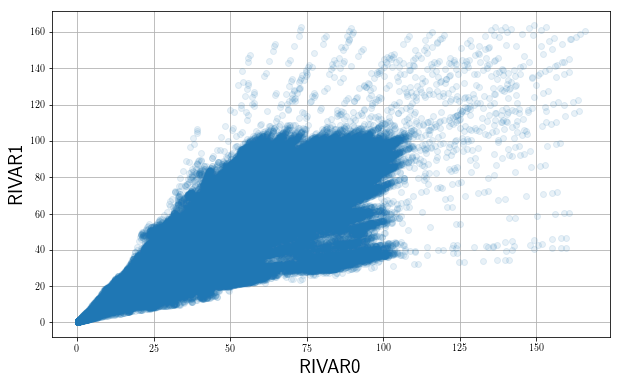

(1072, 2116)
(1123, 2116)


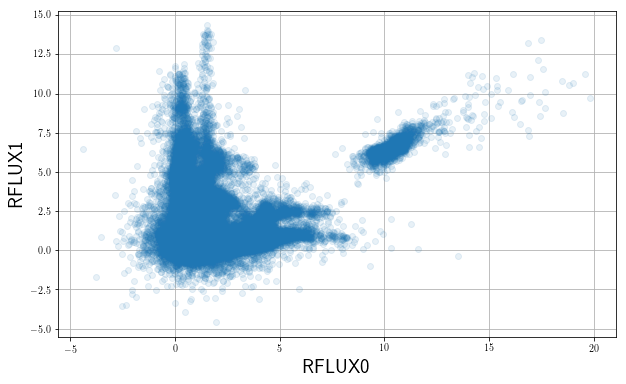

(2399,)
(2399,)


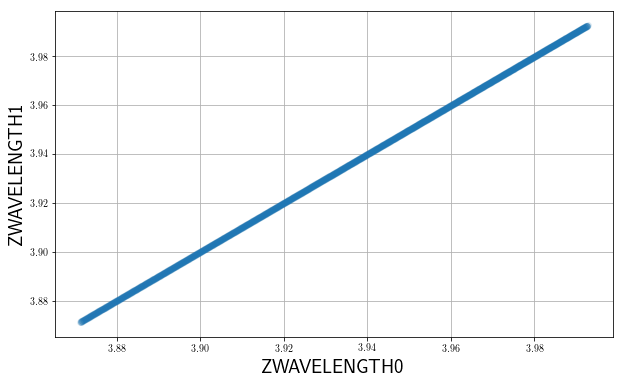

(1072, 2399)
(1123, 2399)


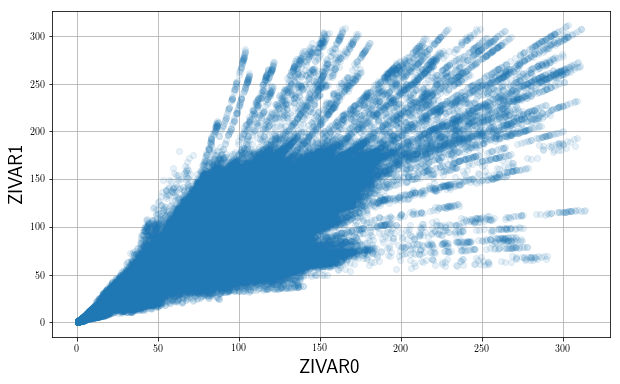

(1072, 2399)
(1123, 2399)


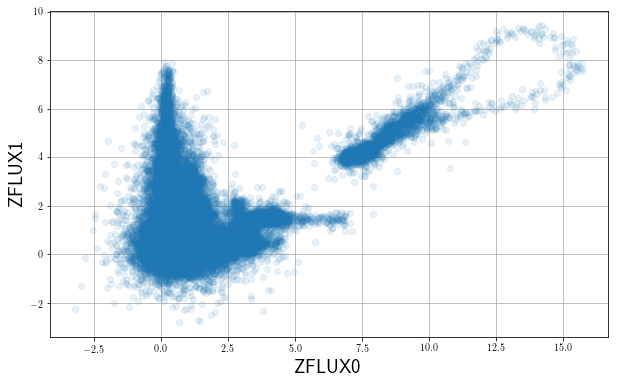

In [8]:
flux = {'Mock0':{}, 'Mock1':{}}
flux['Mock0']['PATH'] = mock0['mock_base']+mock0['quick_ver']+'/spectra-16/0/0/spectra-16-0.fits'
flux['Mock1']['PATH'] = mock1['mock_base']+mock1['quick_ver']+'/spectra-16/0/0/spectra-16-0.fits'

for el in flux.keys():
    h = fitsio.FITS(flux[el]['PATH'])
    flux[el]['RA'] = h['FIBERMAP']['RA_TARGET'][:]
    flux[el]['DEC'] = h['FIBERMAP']['DEC_TARGET'][:]
    flux[el]['TARGETID'] = h['FIBERMAP']['TARGETID'][:]
    for ell in ['B','R','Z']:
        flux[el][ell+'_WAVELENGTH'] = sp.log10(h[ell+'_WAVELENGTH'].read())
        flux[el][ell+'_IVAR'] = h[ell+'_IVAR'].read()*(h[ell+'_MASK'].read()==0)
        flux[el][ell+'_FLUX'] = h[ell+'_FLUX'].read()
    h.close()

for el in ['RA','DEC','TARGETID']:
    plt.errorbar(flux['Mock0'][el][:100],flux['Mock1'][el][:100],fmt='o',alpha=0.1)
    plt.xlabel(el+'0') 
    plt.ylabel(el+'1') 
    plt.grid()
    plt.show()

for el in ['B','R','Z']:
    for ell in ['_WAVELENGTH','_IVAR','_FLUX']:
        print(flux['Mock0'][el+ell].shape)
        print(flux['Mock1'][el+ell].shape)
        if len(flux['Mock0'][el+ell].shape)==2:
            plt.errorbar(flux['Mock0'][el+ell][:100,:],flux['Mock1'][el+ell][:100,:],fmt='o',alpha=0.1)
        else:
            plt.errorbar(flux['Mock0'][el+ell],flux['Mock1'][el+ell],fmt='o',alpha=0.1)
        plt.xlabel( (el+ell+'_0').replace('_','') ) 
        plt.ylabel( (el+ell+'_1').replace('_','') ) 
        plt.grid()
        plt.show()

## __Compare delta field__

In [9]:
delta0 = fitsio.FITS(mock0['delta']+'/delta-100.fits.gz')
delta1 = fitsio.FITS(mock1['delta']+'/delta-100.fits.gz')

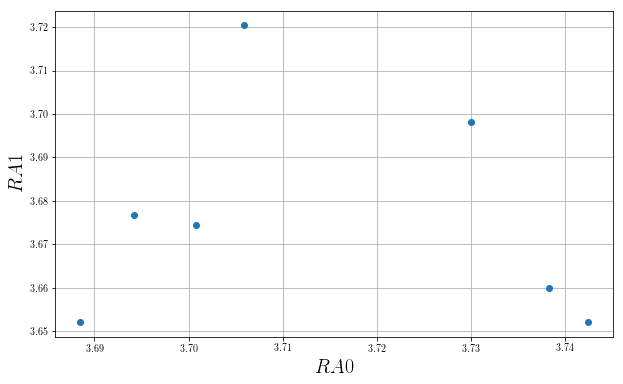

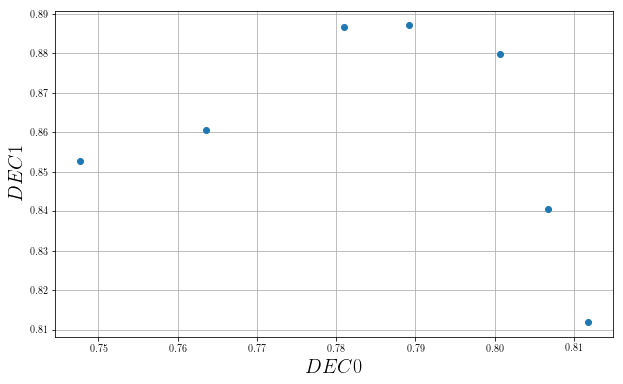

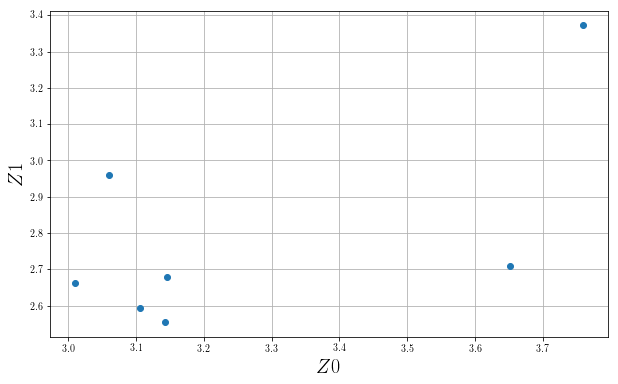

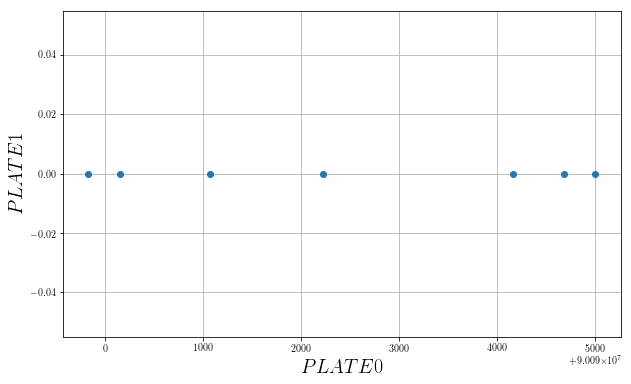

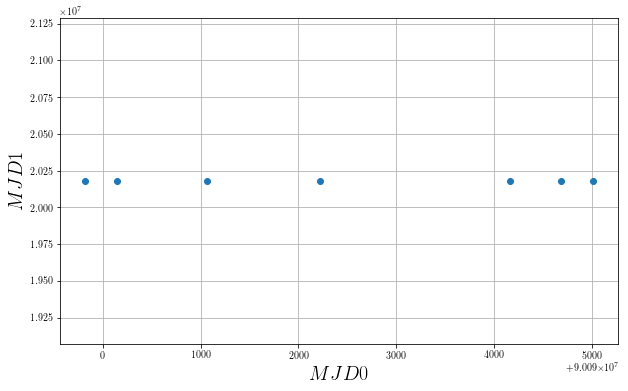

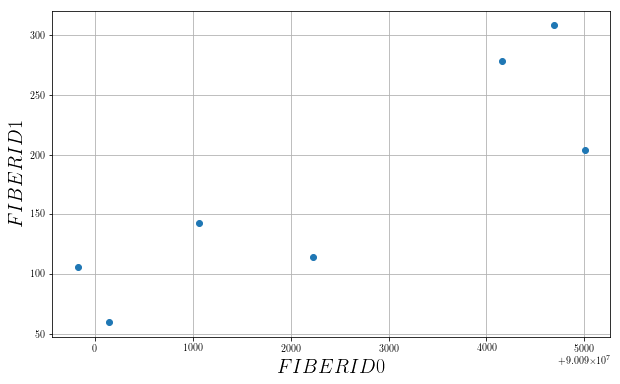

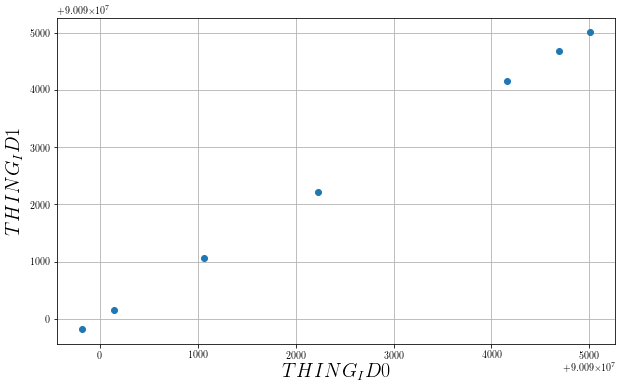

In [10]:
### Attributes
for k in ['RA','DEC','Z','PLATE','MJD','FIBERID','THING_ID']:
    xxx = []
    yyy = []
    for i in range(1,100):
        mockid = delta0[i].read_header()['EXTNAME']
        try:
            kv0 = delta0[mockid].read_header()[k]
            kv1 = delta1[mockid].read_header()[k]
        except:
            continue
        xxx += [kv0]
        yyy += [kv1]
    xxx = sp.array(xxx)
    yyy = sp.array(yyy)
    plt.errorbar(xxx,yyy,fmt='o')
    plt.xlabel(r'$'+k+'0$')
    plt.ylabel(r'$'+k+'1$')
    plt.grid()
    plt.show()

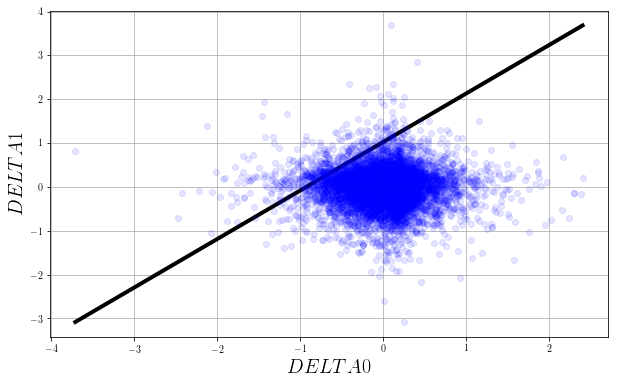

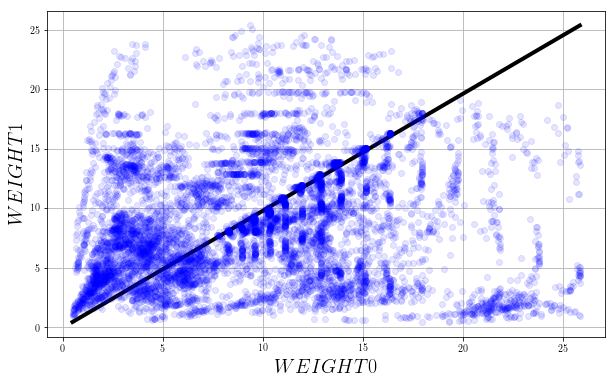

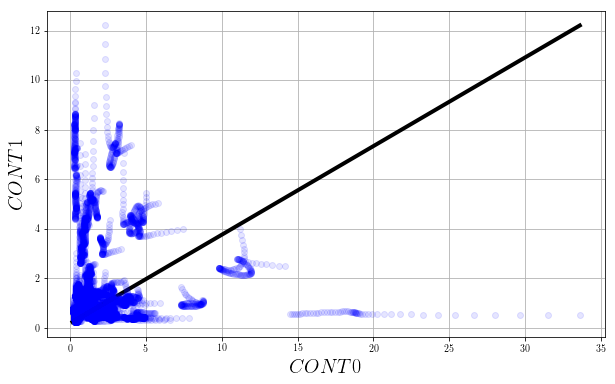

In [11]:
### Values
for k in ['DELTA','WEIGHT','CONT']:
    xmin = 1.e6
    ymin = 1.e6
    xmax = -1.e6
    ymax = -1e6
    xxx = []
    yyy = []
    for i in range(1,1000):
        mockid = delta0[i].read_header()['EXTNAME']
        try:
            kv0 = delta0[mockid][k][:]
            kv1 = delta1[mockid][k][:]
        except:
            continue
        w0 = sp.in1d(delta0[mockid]['LOGLAM'][:],delta1[mockid]['LOGLAM'][:])
        w1 = sp.in1d(delta1[mockid]['LOGLAM'][:],delta0[mockid]['LOGLAM'][:])
        if w0.sum()==0: continue
        plt.errorbar(kv0[w0],kv1[w1],fmt='o',alpha=0.1,color='blue')
        xmin = min(xmin,kv0[w0].min())
        xmax = max(xmax,kv0[w0].max())
        ymin = min(ymin,kv1[w1].min())
        ymax = max(ymax,kv1[w1].max())
    plt.plot([xmin,xmax],[ymin,ymax],color='black')
    plt.xlabel(r'$'+k+'0$')
    plt.ylabel(r'$'+k+'1$')
    plt.grid()
    plt.show()

# __Compute 1d cross-correlation__

To compute the cross-correlation between Lya forest from a mock to the Lya forest of another mock,
simply copy the following command in your terminal

In [12]:
cmd = 'do_cf1d.py'
cmd += ' --in-dir '+mock0['delta']
cmd += ' --out ' +mockProducts['cf1d_cross'].replace('cf1d_cross','cf1d_0')
cmd += ' --nside 8'
print(cmd)
print()

cmd = 'do_cf1d.py'
cmd += ' --in-dir '+mock1['delta']
cmd += ' --out ' +mockProducts['cf1d_cross'].replace('cf1d_cross','cf1d_1')
cmd += ' --nside 8'
print(cmd)
print()

cmd = 'do_cf1d.py'
cmd += ' --in-dir '+mock0['delta']
cmd += ' --in-dir2 '+mock1['delta']
cmd += ' --out ' +mockProducts['cf1d_cross']
cmd += ' --nside 8'
print(cmd)

do_cf1d.py --in-dir /project/projectdirs/desi/mocks/lya_forest/picca/london/v4.0.0/quick-2.0/deltas/ --out $HOME/Run_programs/igmhub/picca/CoLoRe_mocks/v4.0.0_v4.0.1/Correlations/cf1d_0.fits.gz --nside 8

do_cf1d.py --in-dir /project/projectdirs/desi/mocks/lya_forest/picca/london/v4.0.1/quick-2.0/deltas/ --out $HOME/Run_programs/igmhub/picca/CoLoRe_mocks/v4.0.0_v4.0.1/Correlations/cf1d_1.fits.gz --nside 8

do_cf1d.py --in-dir /project/projectdirs/desi/mocks/lya_forest/picca/london/v4.0.0/quick-2.0/deltas/ --in-dir2 /project/projectdirs/desi/mocks/lya_forest/picca/london/v4.0.1/quick-2.0/deltas/ --out $HOME/Run_programs/igmhub/picca/CoLoRe_mocks/v4.0.0_v4.0.1/Correlations/cf1d_cross.fits.gz --nside 8


Let's plot it

In [13]:
### List of all the correlation to plot
all_cf1d = {'mock0':mockProducts['cf1d_cross'].replace('cf1d_cross','cf1d_0'),
            'mock1':mockProducts['cf1d_cross'].replace('cf1d_cross','cf1d_1'),
            'Cross':mockProducts['cf1d_cross']}

Couldnt find file $HOME/Run_programs/igmhub/picca/CoLoRe_mocks/v4.0.0_v4.0.1/Correlations/cf1d_cross.fits.gz, skipping


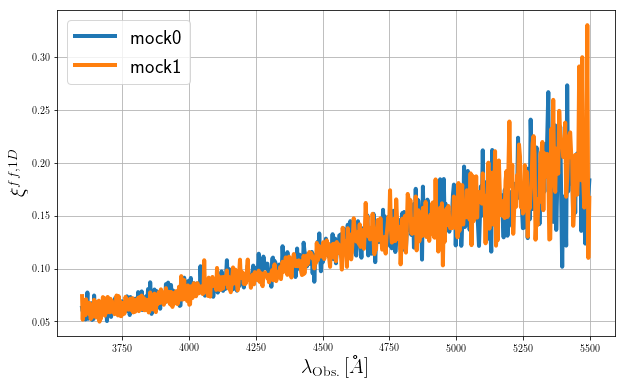

In [14]:
### The variance
for name,path in all_cf1d.items():
    try:
        h = fitsio.FITS(path)
    except:
        print('Couldnt find file {}, skipping'.format(path))
        continue
    head = h[1].read_header() #- in the future replace '1' by '1DCOR'
    llmin = head['LLMIN']
    llmax = head['LLMAX']
    dll = head['DLL']
    n1d = int((llmax-llmin)/dll+1)
    x = sp.arange(0.,n1d)*dll+llmin
    y = h[1]['v1d'][:]
    w = h[1]['wv1d'][:]>0.
    x = x[w]
    y = y[w]
    plt.plot(10.**x,y,linewidth=4,label=name)
    h.close()
plt.xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\AA] $')
plt.ylabel(r'$\xi^{ff,1D}$')
plt.legend()
plt.grid()

cant find $HOME/Run_programs/igmhub/picca/CoLoRe_mocks/v4.0.0_v4.0.1/Correlations/cf1d_cross.fits.gz, skipping
Can't find file $HOME/Run_programs/igmhub/picca/CoLoRe_mocks/v4.0.0_v4.0.1/Correlations/cf1d_cross.fits.gz, skipping


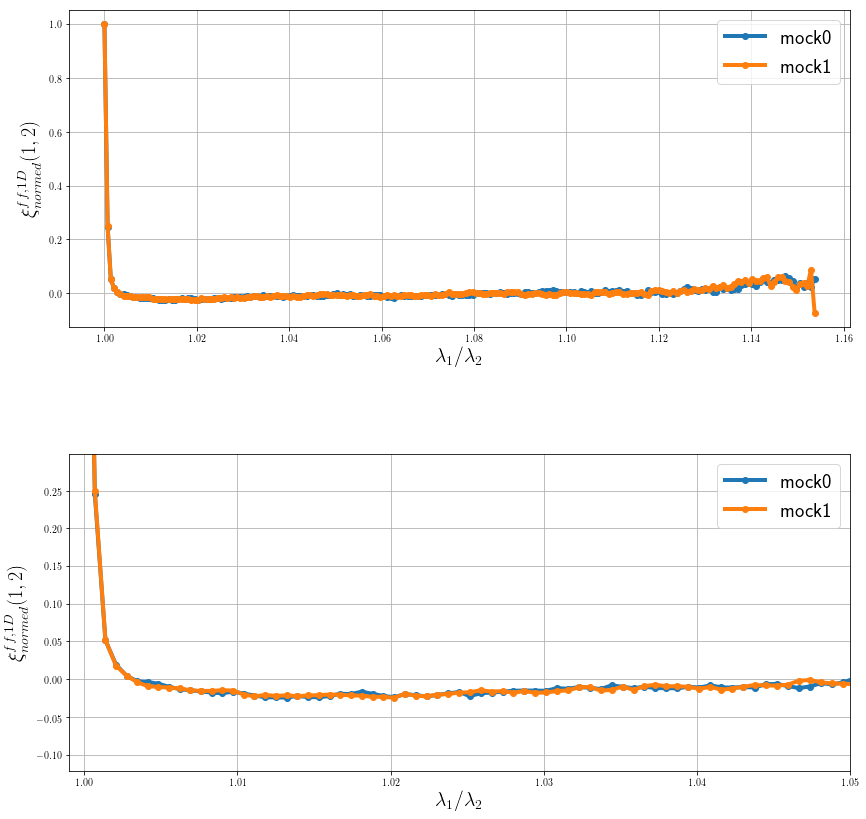

In [15]:
### The normalized correlation
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,14))

### all
for name,path in all_cf1d.items():
    try:
        h = fitsio.FITS(path)
    except:
        print('cant find {}, skipping'.format(path))
        continue
    y = h[1]['c1d'][:] #- in the future replace '1' by '1DCOR'
    binsize = dll
    bins = sp.arange(y.size)
    x = sp.power(10,bins*binsize)
    w = h[1]['nc1d'][:]>0.
    x = x[w]
    y = y[w]
    ax1.errorbar(x,y,marker='o',linewidth=4,label=name)
    h.close()
ax1.set_xlabel(r'$\lambda_{1}/\lambda_{2}$')
ax1.set_ylabel(r'$\xi^{ff,1D}_{normed}(1,2)$')
ax1.legend()
ax1.grid()

### zoom
ymin = 1.e6
ymax = -1.e6
for name,path in all_cf1d.items():
    try:
        h = fitsio.FITS(path)
    except:
        print("Can't find file {}, skipping".format(path))
        continue
    y = h[1]['c1d'][:] #- in the future replace '1' by '1DCOR'
    binsize = dll
    bins = sp.arange(y.size)
    x = sp.power(10,bins*binsize)
    w = h[1]['nc1d'][:]>0.
    x = x[w]
    y = y[w]
    ymin = min(ymin,y.min())
    ymax = max(ymax,y[y!=1.].max())
    ax2.errorbar(x,y,marker='o',linewidth=4,label=name)
    h.close()
ax2.set_xlim([0.999,1.05])
ax2.set_ylim([ymin-0.05,ymax+0.05])
ax2.set_xlabel(r'$\lambda_{1}/\lambda_{2}$')
ax2.set_ylabel(r'$\xi^{ff,1D}_{normed}(1,2)$')
ax2.legend()
ax2.grid()

plt.subplots_adjust(hspace=0.4)

# __Cross covariance of the 3D correlations__

One of the way to look for correlations is to look at the cross-covariance between
different measured 3D correlations in mocks,
simply run the following command into the terminal

In [16]:
cmd = 'export_cross_covariance.py'
cmd += ' --data1 '+mock0['cf_z_0_2.2']
cmd += ' --data2 '+mock1['cf_z_0_2.2']
cmd += ' --out '+mockProducts['cf_z_0_2.2_cross_covar']
print(cmd)

export_cross_covariance.py --data1 /project/projectdirs/desi/mocks/lya_forest/picca/london/v4.0.0/quick-2.0/cf_z_0_2.2.fits --data2 /project/projectdirs/desi/mocks/lya_forest/picca/london/v4.0.1/quick-2.0/cf_z_0_2.2.fits --out $HOME/Run_programs/igmhub/picca/CoLoRe_mocks/v4.0.0_v4.0.1/Correlations/cf_z_0_2.2_cross_covar.fits.gz


Let's look at the matrix

In [17]:
h = fitsio.FITS(mockProducts['cf_z_0_2.2_cross_covar'])
co = h['COVAR']['CO'][:]
cor = h['COVAR']['COR'][:]

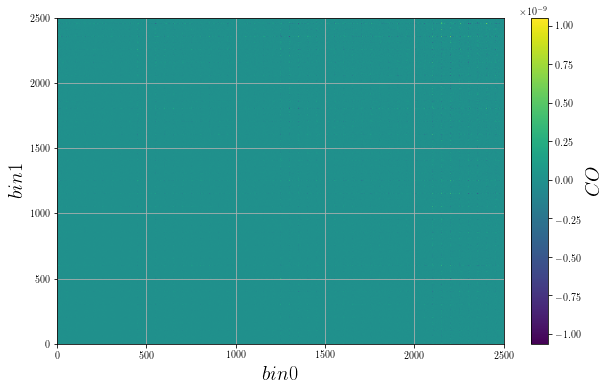

In [18]:
plt.imshow(co, interpolation='nearest', origin='lower', aspect='auto')
cbar = plt.colorbar()
cbar.set_label(r'$CO$',size=20)
cbar.update_ticks()
plt.xlabel(r'$bin0$')
plt.ylabel(r'$bin1$')
plt.grid()

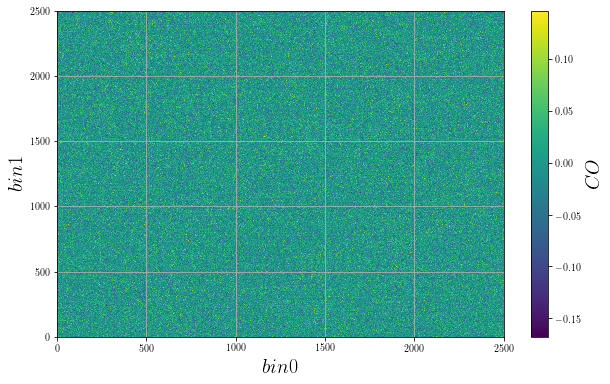

In [19]:
plt.imshow(cor, interpolation='nearest', origin='lower', aspect='auto')
cbar = plt.colorbar()
cbar.set_label(r'$CO$',size=20)
cbar.update_ticks()
plt.xlabel(r'$bin0$')
plt.ylabel(r'$bin1$')
plt.grid()

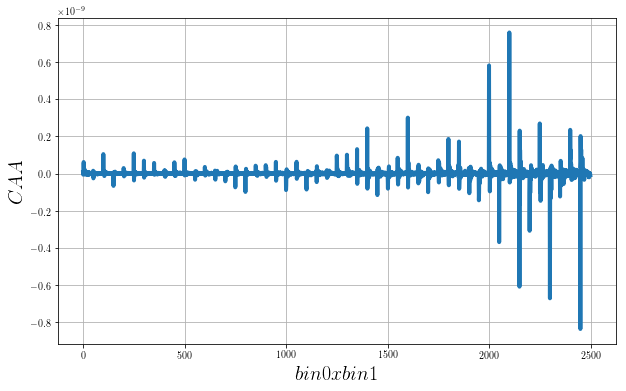

In [20]:
### Variance
plt.plot(sp.diag(co),linewidth=4)
plt.xlabel(r'$bin0 x bin1$')
plt.ylabel(r'$CAA$')
plt.grid()
plt.show()

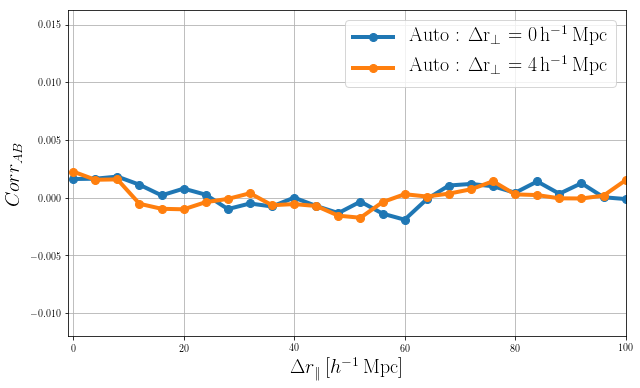

In [21]:
### The cross-correlation
ymin = 1.
ymax = -1.
for j in range(2):
    c = cor.copy()
    a = sp.array( [ sp.mean(sp.diagonal(c, offset=(50*i+j))) for i in range(2500//50) ])
    label = '\mathrm{Auto: \, \Delta r_{\perp} = '+str(int(4*j))+'\,h^{-1}\, \mathrm{Mpc}}'
    plt.plot(4*sp.arange(2500//50),a,linewidth=4,marker='o',markersize=8, label=r'$'+label+'$')
    ymin = min(ymin,a.min())
    ymax = max(ymax,a[a!=1.].max())
plt.xlabel(r'$\Delta r_{\parallel} \, [h^{-1}\, \mathrm{Mpc}]$')
plt.ylabel(r'$Corr_{AB}$')
plt.xlim([-1.,100.])
plt.ylim([ymin-0.01,ymax+0.01])
plt.legend()
plt.grid()
plt.show()